In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# エクセルファイルの読み込み
SIS_df=pd.read_excel("SIS分析プロジェクト_日刊60日切り-週間100データ対応_容量削減ver_200819.xlsm",
                     sheet_name="日毎データ累積",
                     header=1,
                     encoding="cp932")
SIS_df_droped=SIS_df.dropna(subset=["機種名"])
SIS_df_droped['機種名']=SIS_df_droped['機種名'].str.strip()
Spec_df=pd.read_excel("右打ちチェック用市場データ改β.xlsm",
                      sheet_name="データベース",                      
                      encoding="cp932")
Product_df=pd.read_excel("過去機種データベースまとめ_200416.xlsx",
                         sheet_name="オール機種 数値化",
                         header=11,
                         encoding="cp932")

<ipython-input-91-8cbb3741f022>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SIS_df_droped['機種名']=SIS_df_droped['機種名'].str.strip()


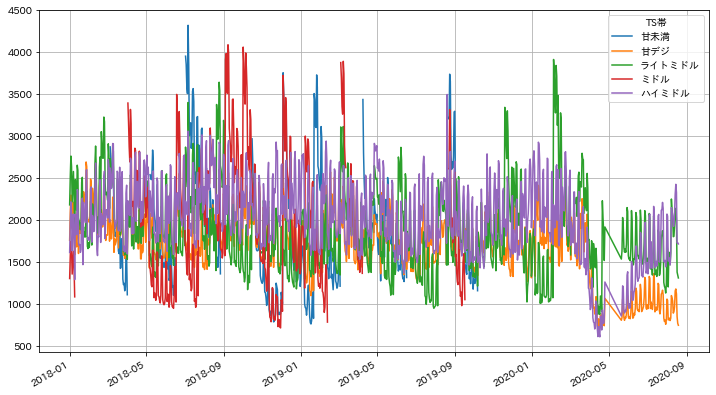

In [90]:
SIS_df_reset=SIS_df_droped.set_index("日付")["2018-01-01":].reset_index()
pivot_SIS_df=SIS_df_reset.pivot_table(index="機種名", 
                                      columns="日付",
                                      values="アウト",
                                      aggfunc="mean")
                                   
# 対象となる日付をリスト化して保持
date_list=list(pivot_SIS_df.columns)
# データフレームの結合
merge_df=pd.merge(left=pivot_SIS_df,
                  right=Spec_df,
                  left_index=True,
                  right_on="Product_name",
                  how="left")
df_renamed=merge_df.rename(columns={"Oneshot_Rate":"単発率",
                                     "SurfaceCont_Rate":"名目継続率",
                                     "HeavenRush_Rate":"天国突入率"})
# 継続率をビン分割
Cont_bins = [0,0.5,0.6,0.7,0.8,0.9,1]
TS_bins = [0,70,150,220,270,320]
Contbins_names=["継続0%-50%","継続50%-60%","継続60%-70%","継続70%-80%","継続80%-90%","継続90%-100%"]
TSbins_names=["甘未満","甘デジ","ライトミドル","ミドル","ハイミドル"]
# dfにビンの列を追加
df_renamed["継続率帯"] = pd.cut(df_renamed["名目継続率"], Cont_bins, labels=contbins_names)
df_renamed["TS帯"] = pd.cut(df_renamed["TS"], TS_bins, labels=TSbins_names)
grouped=df_renamed.groupby("TS帯").mean()[date_list].T
grouped.plot(figsize=(12,7),grid=True)

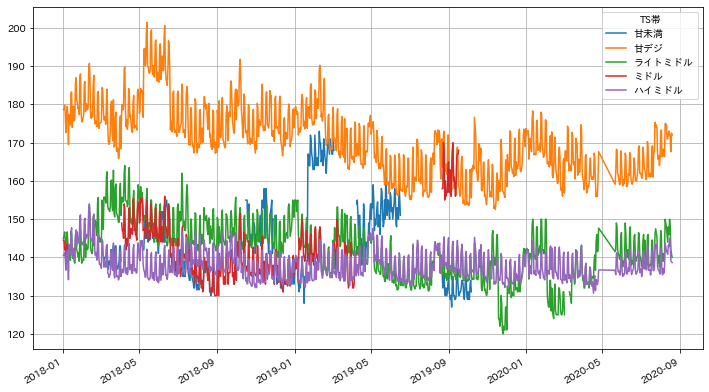

In [99]:
SIS_df_droped=SIS_df_droped.set_index("日付")["2018-01-01":].reset_index()
pivot_SIS_df=SIS_df_droped.pivot_table(index="機種名", 
                                       columns="日付",
                                       values="客滞",
                                       aggfunc="mean")
# 対象となる日付をリスト化して保持
date_list=list(pivot_SIS_df.columns)
# データフレームの結合
merge_df=pd.merge(left=pivot_SIS_df,
                  right=Spec_df,
                  left_index=True,
                  right_on="Product_name",
                  how="left")
df_renamed=merge_df.rename(columns={"Oneshot_Rate":"単発率",
                                     "SurfaceCont_Rate":"名目継続率",
                                     "HeavenRush_Rate":"天国突入率",
                                     "FirtstT1Y_Ave":"初回平均T1Y",
                                     "GuessSimMY_Ave":"平均MY"})
# 継続率をビン分割
Cont_bins = [0,0.5,0.6,0.7,0.8,0.9,1]
TS_bins = [0,70,150,220,270,320]
Contbins_names=["継続0%-50%","継続50%-60%","継続60%-70%","継続70%-80%","継続80%-90%","継続90%-100%"]
TSbins_names=["甘未満","甘デジ","ライトミドル","ミドル","ハイミドル"]
# dfにビンの列を追加
df_renamed["継続率帯"] = pd.cut(df_renamed["名目継続率"], Cont_bins, labels=contbins_names)
df_renamed["TS帯"] = pd.cut(df_renamed["TS"], TS_bins, labels=TSbins_names)
grouped=df_renamed.groupby("TS帯").mean()[date_list].T
grouped.plot(figsize=(12,7),grid=True)

KeyError: "None of [Index(['sepal_width', '客滞'], dtype='object')] are in the [columns]"

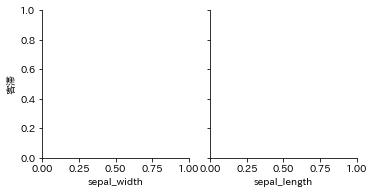

In [93]:
pg = sns.pairplot(df_renamed,
                  hue="TS帯", 
                  x_vars=["初回平均T1Y","単発率","平均MY"],
                  y_vars=
                 )

In [101]:
cust_mean=SIS_df_droped.groupby("機種名").mean().loc[:,"客滞"]
cust_mean

機種名
CR ＣＹＢＯＲＧ００９ L-V                137.357143
CR ＦＡＩＲＹ ＴＡＩＬ FPM               130.250000
CR ＧＧＧＧ ZB（ＡＬＬ２０２５　ｗｉｔｈ　１００）    145.136364
CR Ｊ－ＲＵＳＨ４ HSJ                  159.555556
CR ＪＡＷＳ再臨H1BY2                  127.875000
                                   ...    
P銭形平次２ V2L                      132.340000
P闘将覇伝HSJ-W                      123.214286
P魔法先生ネギま！ZZ-Y                   166.750000
P魔法少女リリカルなのは２ XCB               128.071429
P鳳凰∞2                           138.359375
Name: 客滞, Length: 374, dtype: float64